# **Iris Dataset: Simple Exploratory Data Analysis (EDA)**

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
data = pd.read_csv('../input/iris/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.drop(columns='Id', inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
data.isna().values.any()

False

In [9]:
data[data.duplicated()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [10]:
data.duplicated().value_counts()

False    147
True       3
dtype: int64

In [11]:
data.drop_duplicates(inplace=True)
data.shape

(147, 5)

In [12]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000


# **Iris Dataset: Data Visualisation**

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

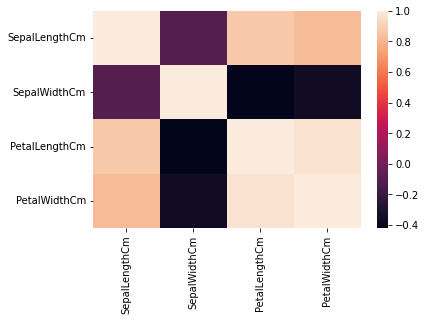

In [15]:
sns.heatmap(data=data.corr())

In [16]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

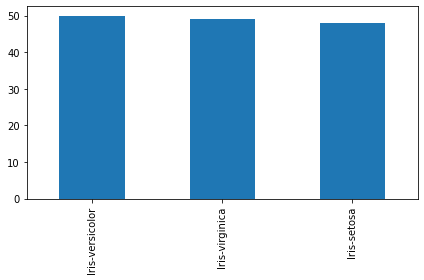

In [17]:
data['Species'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

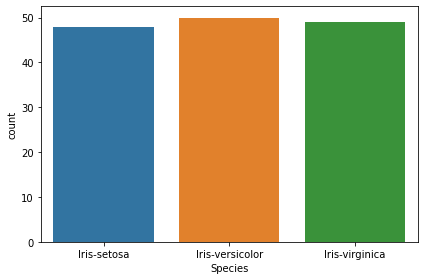

In [18]:
sns.countplot(data=data, x='Species')
plt.tight_layout()

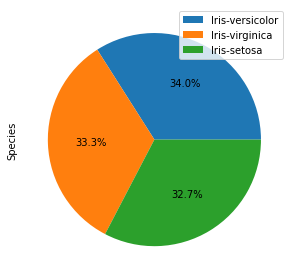

In [19]:
data['Species'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True)
plt.tight_layout()

Text(0.5, 1.0, 'Petal Width')

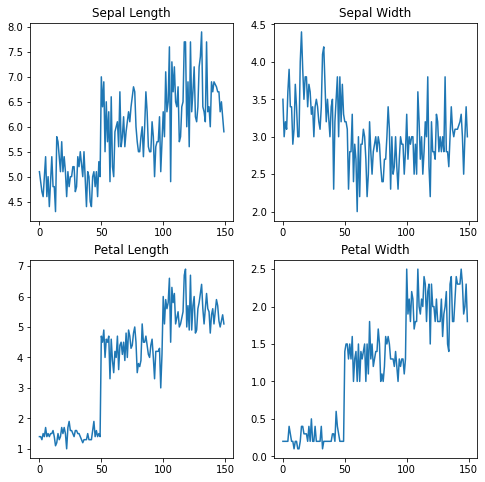

In [20]:
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

data['SepalLengthCm'].plot.line(ax=ax[0][0])
ax[0][0].set_title('Sepal Length')

data['SepalWidthCm'].plot.line(ax=ax[0][1])
ax[0][1].set_title('Sepal Width')

data['PetalLengthCm'].plot.line(ax=ax[1][0])
ax[1][0].set_title('Petal Length')

data['PetalWidthCm'].plot.line(ax=ax[1][1])
ax[1][1].set_title('Petal Width')

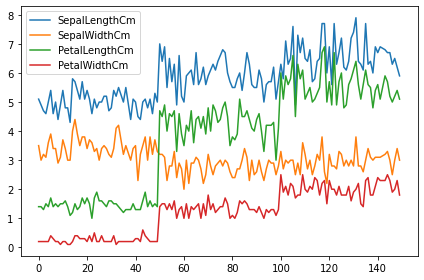

In [21]:
data.plot()
plt.tight_layout()

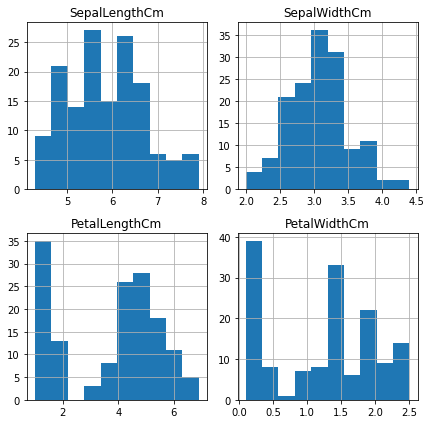

In [22]:
data.hist(figsize=(6,6), bins=10)
plt.tight_layout()

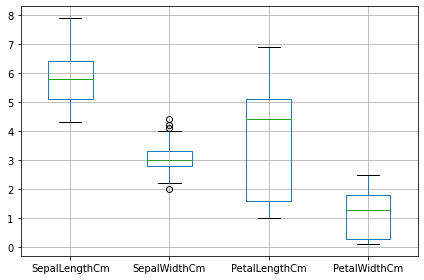

In [23]:
data.boxplot()
plt.tight_layout()

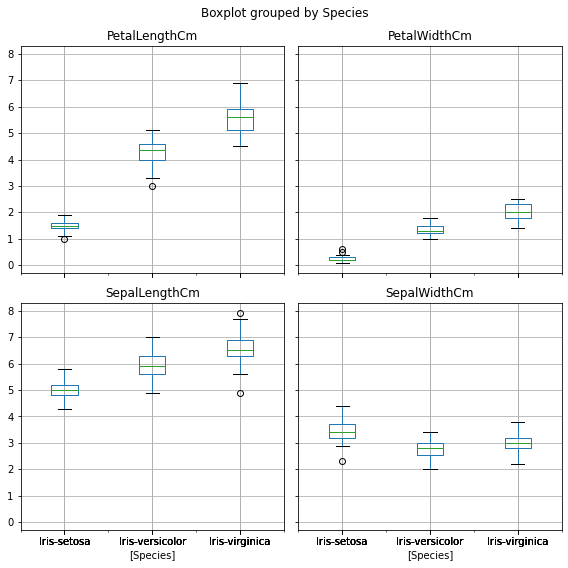

In [24]:
data.boxplot(by='Species', figsize=(8,8))
plt.tight_layout()

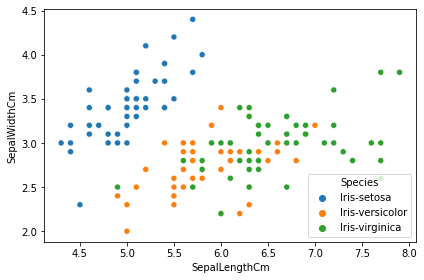

In [25]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=data, hue='Species')
plt.tight_layout()

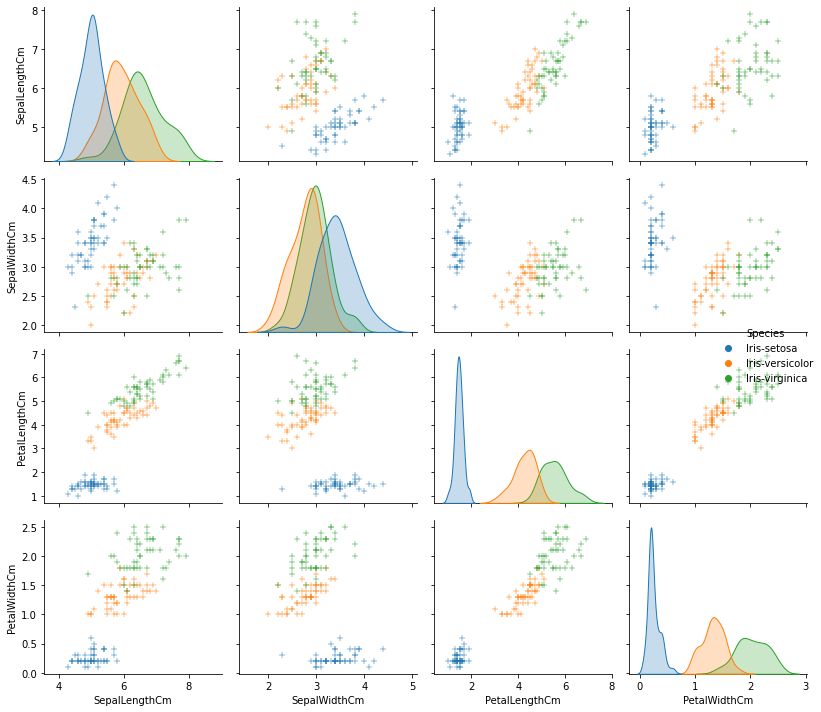

In [26]:
sns.pairplot(data, hue='Species', markers='+')
plt.tight_layout()

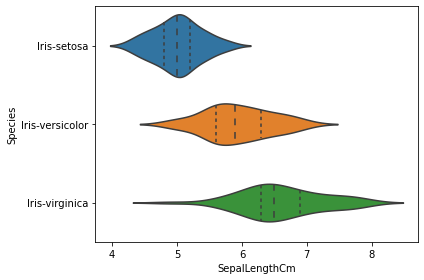

In [27]:
sns.violinplot(data=data, y='Species', x='SepalLengthCm', inner='quartile')
plt.tight_layout()

# **Iris Dataset: Classification Models**

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [29]:
X = data.drop(columns='Species')
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [30]:
y = data['Species']
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=10)
print('training dataset')
print(X_train.shape)
print(y_train.shape)
print('testing dataset')
print(X_test.shape)
print(y_test.shape)

training dataset
(88, 4)
(88,)
testing dataset
(59, 4)
(59,)


## **K Nearest Neighbors**

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train,y_train)
    y_pred = model_knn.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))

<function matplotlib.pyplot.show(close=None, block=None)>

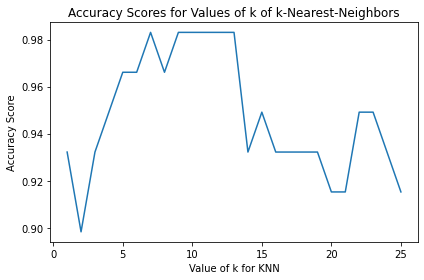

In [34]:
plt.plot(k_range,scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.tight_layout()
plt.show

In [35]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train,y_train)
y_pred = model_knn.predict(X_test)

#### **Accuracy Score**

In [36]:
print(accuracy_score(y_test,y_pred))

0.9322033898305084


#### **Confusion Matrix**

In [37]:
print(confusion_matrix(y_test,y_pred))

[[18  0  0]
 [ 0 19  2]
 [ 0  2 18]]


#### **Classification Report**

In [38]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.90      0.90      0.90        21
 Iris-virginica       0.90      0.90      0.90        20

       accuracy                           0.93        59
      macro avg       0.93      0.93      0.93        59
   weighted avg       0.93      0.93      0.93        59



## **Logistic Regression**

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
model_logreg = LogisticRegression(solver='lbfgs', multi_class='auto')
model_logreg.fit(X_train, y_train)
y_pred = model_logreg.predict(X_test)

In [41]:
print(accuracy_score(y_test,y_pred))

0.9322033898305084


In [42]:
print(confusion_matrix(y_test,y_pred))

[[18  0  0]
 [ 0 20  1]
 [ 0  3 17]]


In [43]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.87      0.95      0.91        21
 Iris-virginica       0.94      0.85      0.89        20

       accuracy                           0.93        59
      macro avg       0.94      0.93      0.93        59
   weighted avg       0.93      0.93      0.93        59



## **Support Vector Classifier**

In [44]:
from sklearn.svm import SVC

In [45]:
model_svc = SVC(gamma='scale')
model_svc.fit(X_train,y_train)
y_pred = model_svc.predict(X_test)

## **Decision Tree Classifier**

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
y_pred = model_dt.predict(X_test)

## **Random Forest Classifier**

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train,y_train)
pred_rf = model_rf.predict(X_test)

### **Accuracy Comparison for Various Models**

In [50]:
models = [model_knn, model_logreg, model_svc, model_dt, model_rf]
accuracy_scores = []
for model in models:
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    accuracy_scores.append(accuracy)
    
print(accuracy_scores)

[0.9491525423728814, 0.9491525423728814, 0.9491525423728814, 0.9491525423728814, 0.9491525423728814]


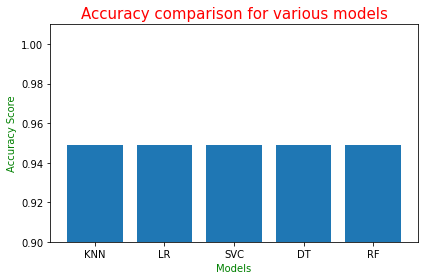

In [51]:
plt.bar(['KNN', 'LR', 'SVC', 'DT', 'RF'], accuracy_scores)
plt.ylim(0.9,1.01)
plt.title('Accuracy comparison for various models', fontsize=15, color='r')
plt.xlabel('Models', fontsize=10, color='g')
plt.ylabel('Accuracy Score', fontsize=10, color='g')
plt.tight_layout()
plt.show()